In [1]:
#networkx para teoría de grafos, matplot para gráficar y random para generar números aleatorios
!pip install powerlaw
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
from scipy import stats as st
import math 
from scipy.optimize import fsolve
import powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp37-none-any.whl size=24789 sha256=14bbac11189658250b1dd453085ce3096a0815f596d96f55ca0097e7c694cfce
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [2]:
def Degree_Sec_Generator(Probabilidad_Acumulada,longitud_Secuencia):
  """
  (Vector Probabilidada Acumulada, Longitud Secuencia) -------> Secuencia de enteros con la distribución del vector
  """
  Degree_Sequence = []
  sum = 0
  for i in range(longitud_Secuencia):
    k = st.uniform.rvs(scale = Probabilidad_Acumulada[len(Probabilidad_Acumulada)-1]) #Se generan números aleatoriamente entre 0 y 0.9999
    for j in range(len(Probabilidad_Acumulada)):
      if k <= Probabilidad_Acumulada[j]: # Asocia un entero positivo a cada número entre 0-0.9999
        Degree_Sequence.append(j) #construye el vector con los enteros positivos asociados a los números entre 0-1
        break
  return Degree_Sequence

In [3]:

#este algoritmo es para muestrear secuencias de grado acorde a una distribución de probabilidad y calcular la secuencia de grado promedio
def Deg_Sec_Prom(Muestreo_seq,Number_nodes,Probability_distribution):
  Deg = []
  for i in range(Muestreo_seq):
    Deg.append([])
    for k in range(10000):
      Degree_Sequence = Degree_Sec_Generator(Probability_distribution,Number_nodes)
      if nx.is_valid_degree_sequence_havel_hakimi(Degree_Sequence) == True:
        if nx.is_connected(nx.havel_hakimi_graph(Degree_Sequence)) == True:
          Degree_Sequence.sort()
          for l in range(len(Degree_Sequence)):
            Deg[i].append(Degree_Sequence[l])
          break

  Degree_sequence_prom = []
  for i in range(Number_nodes - 10):
    sum = 0
    for j in range(Muestreo_seq):
      sum = sum + Deg[j][i]
    Degree_sequence_prom.append(sum/Muestreo_seq)
  return Degree_sequence_prom


In [4]:
# este programa te calcula los multiplicadores de lagrange dada una secuencia de grado, para el ensamble canonico.
def multp_lagrange_canonico(degre_seq):
  def lagrange_eq(lagrange_multiplicators, degre_seq):
    n = len(lagrange_multiplicators)
    matrix = np.zeros((n,n))
    for i in range(n):
      for j in range(n):
        matrix[i][j] = 1/(math.exp(lagrange_multiplicators[i] + lagrange_multiplicators[j]) + 1)
      matrix[i][i] = 0
    sums = []
    for i in range(n):
      sum = 0
      for j in range(n):
        sum = sum + matrix[i][j]
      sums.append(sum)
    resultado = np.zeros(n)
    for i in range(n):
      resultado[i] = sums[i] - degre_seq[i] 
    return resultado

  x0 = np.zeros(len(degre_seq))
  print(x0)

  multiplicadores = fsolve(lagrange_eq(degre_seq),x0)
  return multiplicadores

In [5]:
# este algoritmo construye la matriz de adyacencia promedio a partir de los multiplicadores de lagrange para un ensamble canonico
def canonical_matrix(Multiplicadores_Lagrange):
  Adyacencia_promedio = []
  for i in range(len(Multiplicadores_Lagrange)):
    Adyacencia_promedio.append([])
    for j in range(len(Multiplicadores_Lagrange)):
      Adyacencia_promedio[i].append(1/(1 + math.exp((Multiplicadores_Lagrange[i] + Multiplicadores_Lagrange[j]))))
  for i in range(len(Multiplicadores_Lagrange)):
    Adyacencia_promedio[i][i] = 0
  return Adyacencia_promedio

In [209]:
#Esta función recibe un xfinal hasta donde sumar y un número de particiones.
#Juntos definen la longitud y el valor máximo del vector resultante
def pareto_cumm_probabilities(particiones,xfin, distribution = st.pareto.cdf):
  """
  (particiones,xfin) -----> (probability_cum_vector)
  Esta función recibe un xfinal hasta donde sumar y un número de particiones.
  Juntos definen la longitud y el valor máximo del vector resultante
  """
  dx = xfin/particiones
  x = []
  probability_cum_vector = []
  for i in range(particiones):
    equis = 1 + dx*i
    x.append(equis)
    pes = st.pareto.cdf(x[i],2.4) #se eligió un coeficiente de 2.4 para la distribución de pareto
    probability_cum_vector.append(pes)
  return probability_cum_vector, x # entrega como resultado el vector y los valores de x asociados

#Nnodes es el número de nodos
xfin = 13
Nnodes = 100
max_degree = Nnodes-1
P, x = pareto_cumm_probabilities(max_degree,xfin) #creamos el vector de probabilidades acumuladas
print(P)


[0.0, 0.2562941243841086, 0.42859973716567756, 0.5493756457953403, 0.6369388378114758, 0.7022174588240688, 0.7520360032755491, 0.7908220874399241, 0.8215428405015042, 0.8462427990767352, 0.8663652795729126, 0.8829510320730346, 0.8967647452066119, 0.9083777481707376, 0.9182233530774623, 0.9266346702211711, 0.9338709374912972, 0.9401361672225446, 0.9455925581427613, 0.95037027943759, 0.9545747014363449, 0.958291803466342, 0.9615922632557555, 0.9645345810860647, 0.9671674892953881, 0.9695318271168288, 0.9716620115921184, 0.9735872005405484, 0.975332218745753, 0.9769183006145128, 0.9783636895091364, 0.9796841243517018, 0.9808932369701393, 0.9820028783205929, 0.9830233876951611, 0.9839638159644934, 0.9848321115625673, 0.9856352761159638, 0.9863794952199727, 0.9870702487713883, 0.9877124044103879, 0.9883102969471431, 0.9888677961118609, 0.9893883645387661, 0.989875107551426, 0.9903308160405975, 0.9907580035024233, 0.9911589381234226, 0.9915356706508192, 0.9918900586656745, 0.9922237877768006

# DESDE ACÁ EMPIEZA EL CODIGO


In [210]:
proms = []
intentos = 200
sum = 0
for i in range(intentos):
  prom = Degree_Sec_Generator(P,Nnodes)
  prom.sort()
  proms.append(prom)
  fit = powerlaw.Fit(prom,discrete = True)
  alpha = fit.power_law.alpha
  sum = sum + alpha
print(sum/intentos,"alpha promedio")
promm = []
for j in range(len(proms[1])):
  sum = 0
  for i in range(len(proms)):
    sum = sum + proms[i][j]

  sum = sum/len(proms)
  promm.append(sum)
print(promm)



Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit

2.432074585181964 alpha promedio
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.01, 1.015, 1.025, 1.045, 1.065, 1.12, 1.14, 1.2, 1.25, 1.32, 1.41, 1.485, 1.54, 1.605, 1.685, 1.77, 1.825, 1.875, 1.905, 1.99, 2.03, 2.05, 2.1, 2.135, 2.175, 2.225, 2.275, 2.375, 2.42, 2.53, 2.61, 2.72, 2.795, 2.83, 2.925, 3.02, 3.11, 3.18, 3.24, 3.33, 3.43, 3.53, 3.665, 3.745, 3.83, 3.945, 4.01, 4.16, 4.265, 4.44, 4.58, 4.725, 4.89, 5.01, 5.18, 5.345, 5.545, 5.735, 5.935, 6.14, 6.33, 6.575, 6.77, 7.005, 7.22, 7.485, 7.805, 8.11, 8.495, 8.845, 9.32, 9.745, 10.26, 10.79, 11.54, 12.23, 13.18, 14.195, 15.28, 16.77, 18.565, 20.8, 23.75, 28.39, 36.6, 51.72]


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [211]:
results = powerlaw.Fit(promm, discrete = True)
print(results.power_law.alpha)
print(results.power_law.xmin)

2.3847523697380217
6.575


Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [212]:
Deg_prom = Deg_Sec_Prom(200,Nnodes,P)

In [213]:
results = powerlaw.Fit(Deg_prom, discrete = True)
print(results.power_law.alpha)
print(results.power_law.xmin)


14.537366412475036
12.315


Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


# este algoritmo muestrea usando el algoritmo de máx entropia y te entrega la matriz de adyacencia_insilico promedio y la secuencia de grado promedio

In [ ]:
#este algoritmo muestrea usando el algoritmo de máx entropia y te entrega la matriz de adyacencia_insilico promedio y la secuencia de grado promedio
%time
muestra = 100
number_of_nodes = 100
connectivity_matrix = np.zeros((muestra, number_of_nodes, number_of_nodes))

Deg_prom_tensor = []  #tensor para al mismo tiempo muestrear las secuencias de grado
Deg = []
for l in range(muestra):
    Deg.append([])
    Number_nodes = number_of_nodes
    for k in range(10000):
      # INICIO DE DEGREE_SEC_GENERATOR
      Degree_Sequence = [] 
      sum = 0
      for i in range(Number_nodes):
        k = st.uniform.rvs(scale = P[len(P)-1]) #muestreo
        for j in range(len(P)):
          if k <= P[j]: # encuentra la probabilidad acumulada siguiente
            Degree_Sequence.append(j)
            break
      # FIN DE DEGREE_SEC GENERATOR
      if nx.is_valid_degree_sequence_havel_hakimi(Degree_Sequence) == True:
        if nx.is_connected(nx.havel_hakimi_graph(Degree_Sequence)) == True:
          Degree_Sequence.sort()
          Degree_Sequence = quitar(Degree_Sequence,number_of_nodes)
          G = nx.havel_hakimi_graph(Degree_Sequence)
          for n in range(len(Degree_Sequence)):
            Deg[l].append(Degree_Sequence[n])
          break
    nx.double_edge_swap(G,nswap=150,max_tries=150000)
    adjacency = nx.adjacency_matrix(G)
    for i in range(number_of_nodes):
      for j in range(number_of_nodes):
        connectivity_matrix[l][i][j] = adjacency[(i,j)]

Degree_sequence_prom = []
for i in range(Number_nodes):
  sum = 0
  for j in range(muestra):
    sum = sum + Deg[j][i]
  Degree_sequence_prom.append(sum/muestra)

adjacencia_insilico = np.zeros((number_of_nodes,number_of_nodes))

for i in range(number_of_nodes):
  for j in range(number_of_nodes):
    adjprom = 0
    for l in range(muestra):
      adjprom = adjprom + connectivity_matrix[l][i][j]
    adjprom = adjprom/muestra
    adjacencia_insilico[i][j] = adjprom

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


# ACÁ SE CALCULAN LOS MULTIPLICADORES DE LAGRANGE

In [ ]:
def lagrange_eq(lagrange_multiplicators, degre_seq):
  n = len(degre_seq)
  matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      matrix[i][j] = 1/(math.exp(lagrange_multiplicators[i] + lagrange_multiplicators[j]) + 1)
    matrix[i][i] = 0
  equations = []
  for i in range(n):
    sum = 0
    for j in range(n):
      sum = sum + matrix[i][j]
    equations.append(sum)
  resultado = np.zeros(n)
  for i in range(n):
    resultado[i] = equations[i] - degre_seq[i] 
  return resultado

x0 = np.zeros(len(Degree_sequence_prom))
def lagrange(lagrange_multiplicators):
  k = lagrange_eq(lagrange_multiplicators,Degree_sequence_prom)
  return k

multiplicadores = fsolve(lagrange,x0)

print(multiplicadores)

[ 7.82689242  7.82689242  7.82689242  7.82689242  7.82689242  7.82689242
  7.82689242  7.82689242  7.82689242  7.82689242  7.82689242  7.82689242
  7.81040122  7.81040122  7.81040122  7.79399681  7.77767737  7.71321493
  7.64998052  7.55723242  7.40762645  7.29185839  7.15140399  7.00172196
  6.89570861  6.70277149  6.61516164  6.61516164  6.54123387  6.48042811
  6.43229772  6.39649588  6.27895891  6.19830597  6.107739    6.04092464
  5.94246488  5.88866828  5.79343904  5.67980765  5.54934667  5.43250964
  5.31901649  5.28191057  5.2087625   5.11927973  4.99753153  4.90465385
  4.84678001  4.74971884  4.63206494  4.51829211  4.43720516  4.25985081
  4.16448474  4.07177298  4.01351037  3.93738538  3.82031921  3.70724424
  3.56969716  3.49200184  3.38403609  3.25375029  3.16293074  3.05508123
  2.94578547  2.85342066  2.69729576  2.5517656   2.45644572  2.31582597
  2.22997741  2.12334113  2.00481981  1.85070227  1.72580258  1.57114022
  1.41185188  1.21740135  1.06566018  0.88592308  0

In [ ]:
Adyacencia_promedio = canonical_matrix(multiplicadores)

In [ ]:
dx = 1/len(Adyacencia_promedio)
x = []
for i in range(len(Adyacencia_promedio)):
  x.append(dx*i)




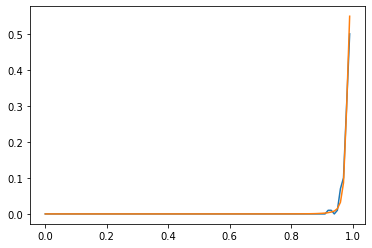

In [ ]:
plt.plot(x,adjacencia_insilico[10])
plt.plot(x,Adyacencia_promedio[10])

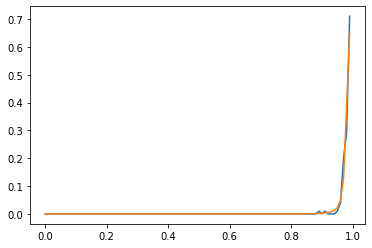

In [ ]:
plt.plot(x,adjacencia_insilico[20])
plt.plot(x,Adyacencia_promedio[20])

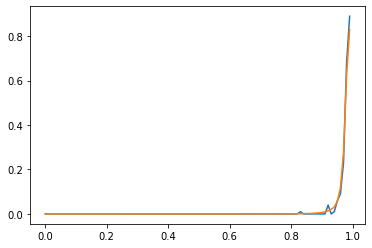

In [ ]:
plt.plot(x,adjacencia_insilico[30])
plt.plot(x,Adyacencia_promedio[30])

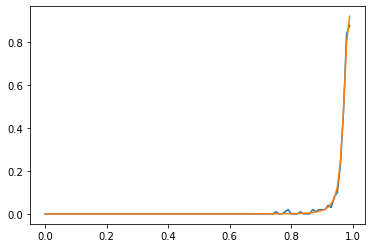

In [ ]:
plt.plot(x,adjacencia_insilico[40])
plt.plot(x,Adyacencia_promedio[40])

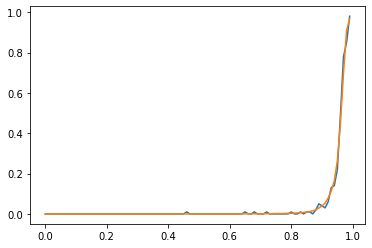

In [ ]:
plt.plot(x,adjacencia_insilico[50])
plt.plot(x,Adyacencia_promedio[50])

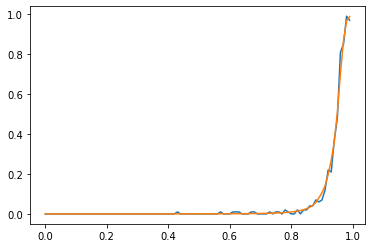

In [ ]:
plt.plot(x,adjacencia_insilico[60])
plt.plot(x,Adyacencia_promedio[60])

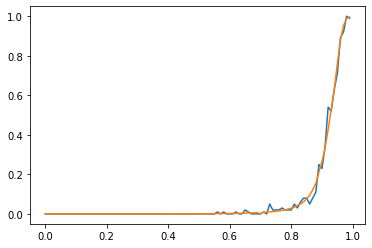

In [ ]:
plt.plot(x,adjacencia_insilico[70])
plt.plot(x,Adyacencia_promedio[70])

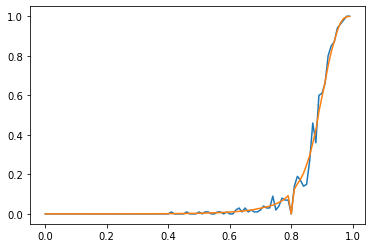

In [ ]:
plt.plot(x,adjacencia_insilico[80])
plt.plot(x,Adyacencia_promedio[80])

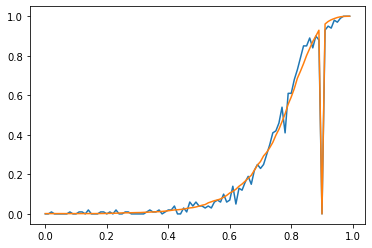

In [ ]:
plt.plot(x,adjacencia_insilico[90])
plt.plot(x,Adyacencia_promedio[90])

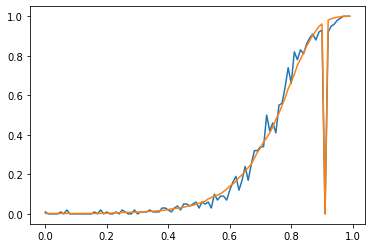

In [ ]:
plt.plot(x,adjacencia_insilico[91])
plt.plot(x,Adyacencia_promedio[91])

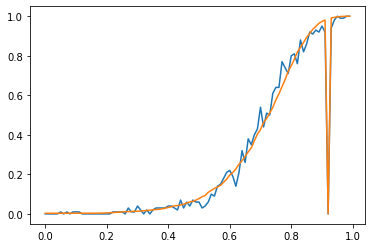

In [ ]:
plt.plot(x,adjacencia_insilico[92])
plt.plot(x,Adyacencia_promedio[92])

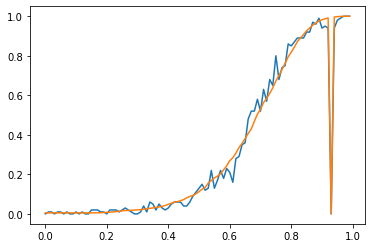

In [ ]:
plt.plot(x,adjacencia_insilico[93])
plt.plot(x,Adyacencia_promedio[93])

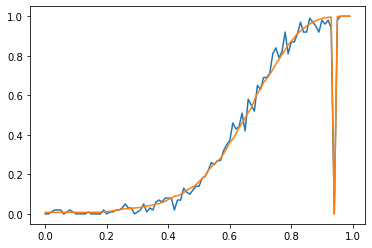

In [ ]:
plt.plot(x,adjacencia_insilico[94])
plt.plot(x,Adyacencia_promedio[94])

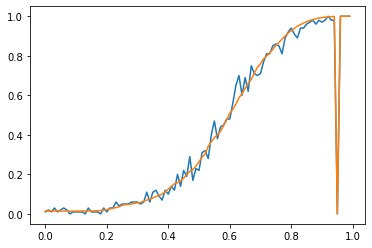

In [ ]:
plt.plot(x,adjacencia_insilico[95])
plt.plot(x,Adyacencia_promedio[95])

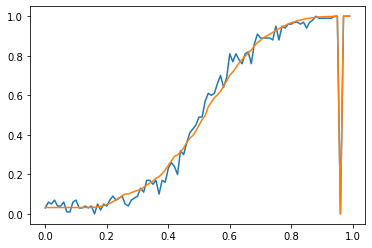

In [ ]:
plt.plot(x,adjacencia_insilico[96])
plt.plot(x,Adyacencia_promedio[96])

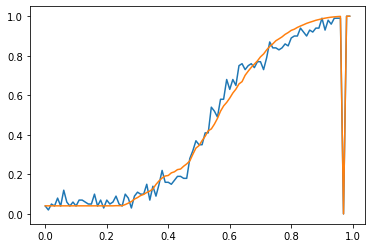

In [ ]:
plt.plot(x,adjacencia_insilico[97])
plt.plot(x,Adyacencia_promedio[97])

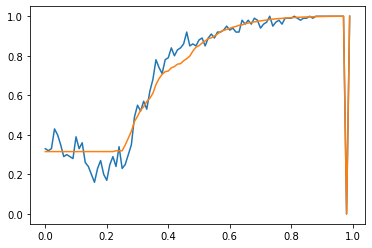

In [ ]:
plt.plot(x,adjacencia_insilico[98])
plt.plot(x,Adyacencia_promedio[98])

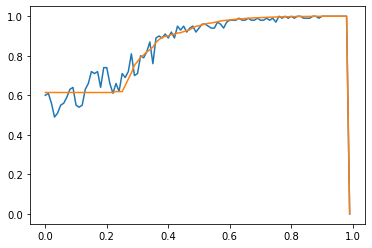

In [ ]:
plt.plot(x,adjacencia_insilico[99])
plt.plot(x,Adyacencia_promedio[99])

In [ ]:
l
# VECTOR QUE CONTENDRA EL GRADO PROMEDIO
sec_prom_insilico = []
for j in range(len(adjacencia_insilico)):
  num = j
  sum = 0
  for i in range(len(adjacencia_insilico[num])):
    sum = sum + adjacencia_insilico[num][i]
  sec_prom_insilico.append(sum)
print(sec_prom_insilico)
print(Degree_sequence_prom)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.005, 1.005, 1.0150000000000001, 1.02, 1.065, 1.095, 1.135, 1.2000000000000002, 1.245, 1.315, 1.3850000000000002, 1.4449999999999998, 1.595, 1.67, 1.76, 1.8050000000000002, 1.895, 1.95, 2.0, 2.035, 2.0949999999999998, 2.1350000000000002, 2.205, 2.2399999999999998, 2.28, 2.38, 2.48, 2.585, 2.69, 2.76, 2.845, 2.9050000000000002, 3.01, 3.105, 3.1950000000000003, 3.295, 3.42, 3.4899999999999998, 3.615, 3.745, 3.84, 3.9650000000000003, 4.095, 4.26, 4.395, 4.539999999999999, 4.7, 4.8549999999999995, 5.05, 5.175, 5.365, 5.550000000000001, 5.824999999999999, 6.02, 6.24, 6.499999999999999, 6.76, 6.965, 7.265000000000001, 7.52, 7.89, 8.235, 8.59, 9.014999999999999, 9.365, 9.799999999999999, 10.359999999999998, 10.945, 11.575, 12.239999999999998, 12.905, 13.825, 14.659999999999998, 15.674999999999999, 16.84, 18.18, 19.73, 21.394999999999996, 23.550000000000004, 26.014999999999993, 29.47500000000001, 33.76, 38.419999999999995, 46.3

In [ ]:
MUESTRA1000 = [0.020999999999999998, 0.016, 0.020000000000000004, 0.018000000000000002, 0.018000000000000002, 0.017, 0.012, 0.011, 0.015, 0.016, 0.02, 0.013000000000000001, 0.014, 0.016, 0.027000000000000003, 0.012, 0.019000000000000003, 0.018000000000000002, 0.019000000000000003, 0.025, 0.02, 0.023, 0.015, 0.034, 0.029, 0.018, 0.022, 0.022, 0.03, 0.031, 0.027000000000000003, 0.04, 0.038000000000000006, 0.036000000000000004, 0.043000000000000003, 0.042, 0.035, 0.044, 0.048, 0.053000000000000005, 0.054, 0.052, 0.067, 0.066, 0.07300000000000001, 0.068, 0.075, 0.095, 0.09, 0.10700000000000001, 0.11399999999999999, 0.11299999999999999, 0.119, 0.115, 0.14400000000000002, 0.147, 0.15700000000000003, 0.183, 0.2, 0.202, 0.233, 0.254, 0.272, 0.31100000000000005, 0.279, 0.329, 0.356, 0.40700000000000003, 0.458, 0.513, 0.526, 0.616, 0.678, 0.732, 0.8130000000000001, 0.886, 0.99, 1.1300000000000001, 1.252, 1.4089999999999998, 1.596, 1.793, 2.018, 2.2569999999999997, 2.5069999999999997, 2.833, 3.1949999999999994, 3.623, 4.077, 4.6899999999999995, 5.281, 6.051, 6.9239999999999995, 7.793, 8.928, 10.144, 11.639, 13.306000000000001, 15.338000000000005, 17.677]
